> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate "No show Appointments" Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables.
>
> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. If you're not sure what questions to ask right now, then make sure you familiarize yourself with the variables and the dataset context for ideas of what to explore.

In [174]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


In [175]:
from collections import Counter

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [176]:
# Load your data and print out a few lines. Perform operations to inspect data

patients_df=pd.read_csv('noshowappointments.csv')
#   types and look for instances of missing or possibly errant data.
patients_df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [177]:
patients_df.tail()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No
110526,3.775115e+14,5629448,F,2016-04-27T13:30:56Z,2016-06-07T00:00:00Z,54,MARIA ORTIZ,0,0,0,0,0,1,No


In [178]:
patients_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [179]:
patients_df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [180]:
did_show_df=patients_df[patients_df['No-show']=='No']
did_show_df

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No


<AxesSubplot:>

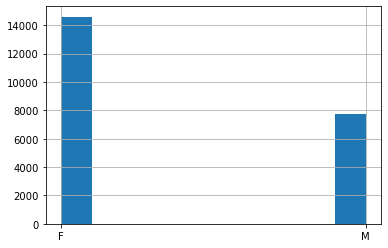

In [181]:
did_not_show_df=patients_df[patients_df['No-show']=='Yes']
did_not_show_df['Gender'].hist()

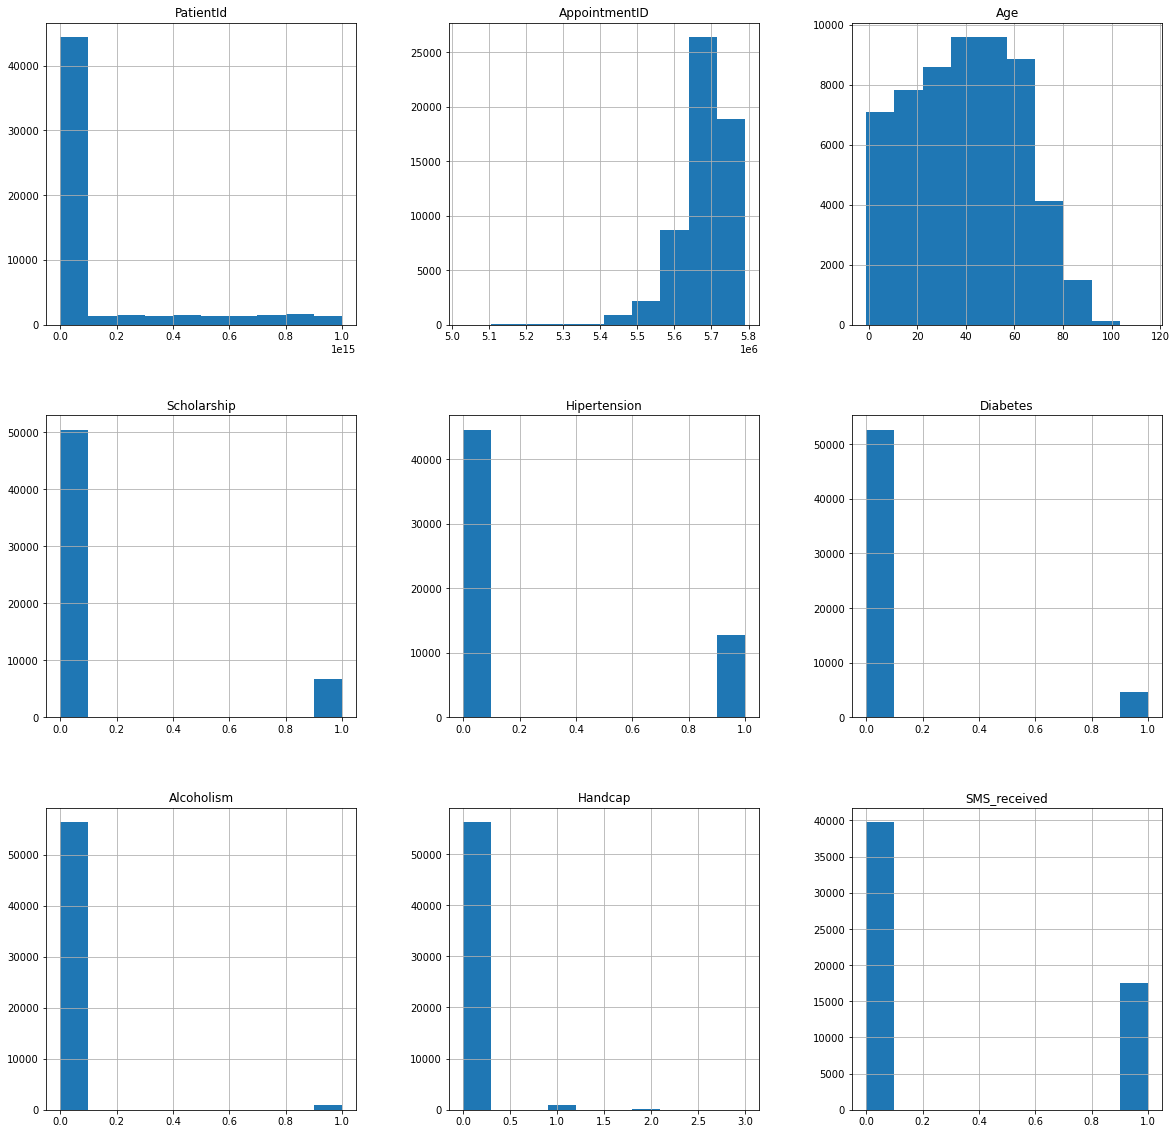

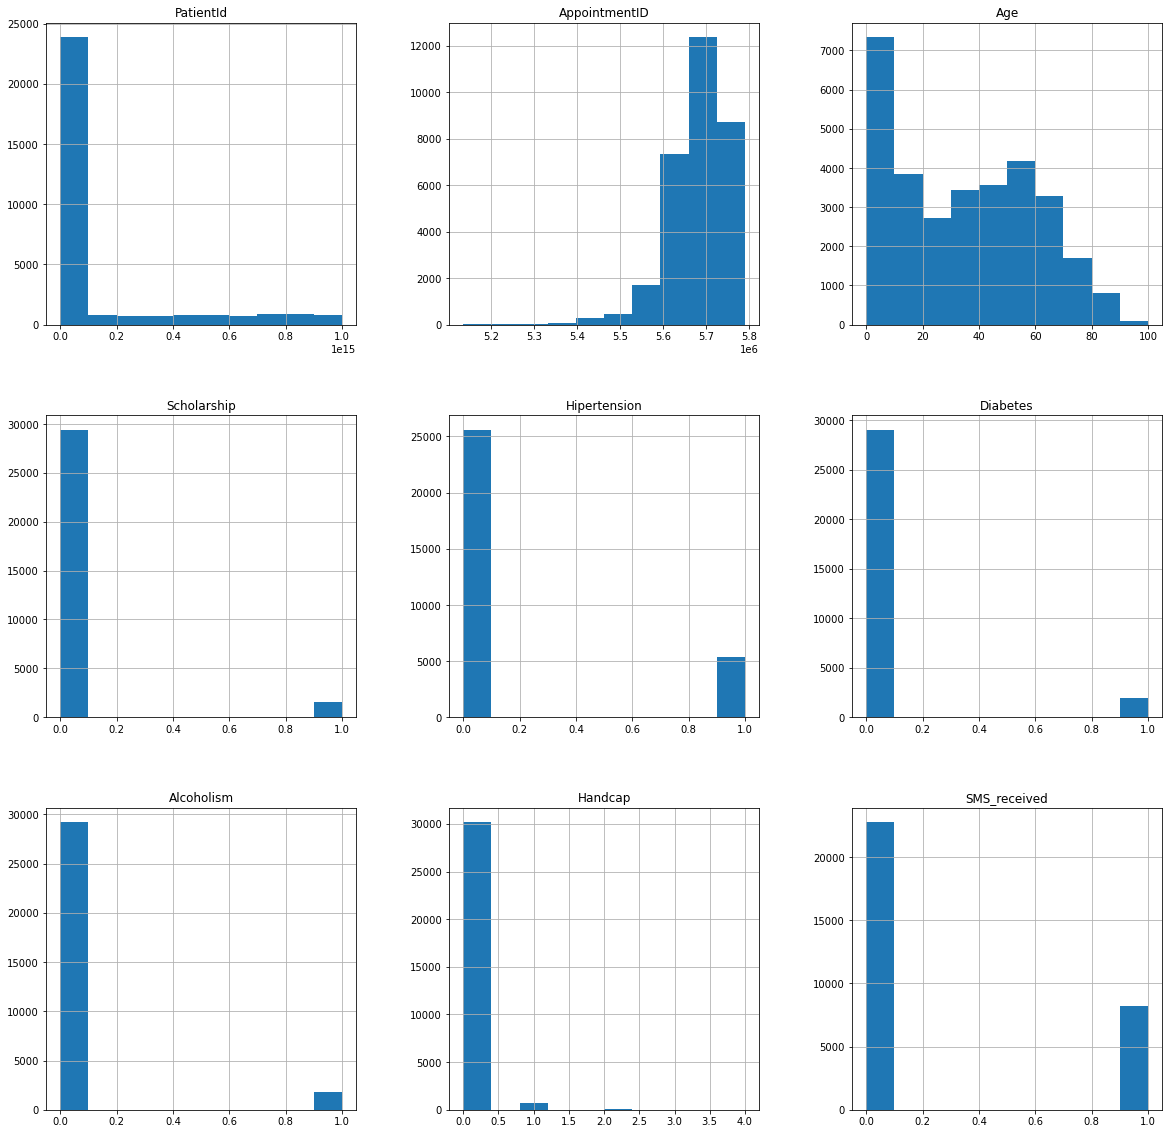

In [182]:
did_show_df.groupby('Gender').hist(figsize=(20,20));

In [183]:
hipertension_df=patients_df[patients_df['Hipertension']==1]
hipertension_df.drop(['Hipertension','Diabetes','Alcoholism','Handcap'],axis=1,inplace=True)

C:\Users\Rehab\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


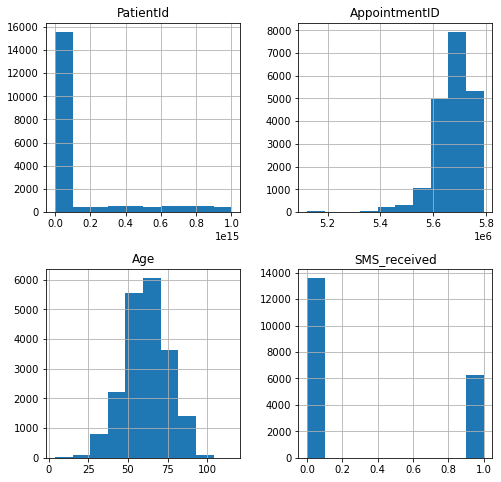

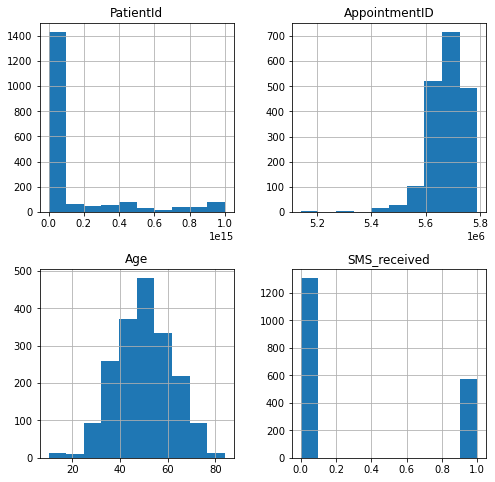

In [184]:
hipertension_df.groupby('Scholarship').hist(figsize=(8,8));

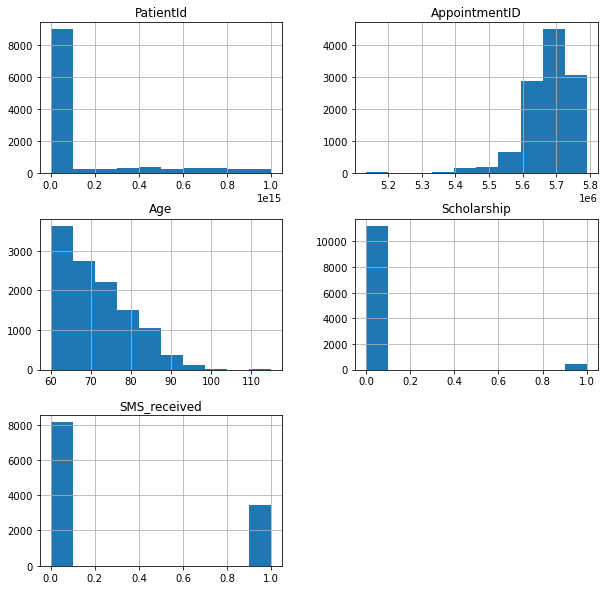

In [185]:
hipertension_df[hipertension_df.Age>=60].hist(figsize=(10,10));

In [186]:
diabetes_df=patients_df[patients_df['Diabetes']==1]
diabetes_df

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
36,7.298459e+13,5637975,F,2016-04-29T07:35:19Z,2016-04-29T00:00:00Z,63,SÃO CRISTÓVÃO,0,1,1,0,0,0,No
37,1.578132e+12,5637986,F,2016-04-29T07:35:56Z,2016-04-29T00:00:00Z,64,TABUAZEIRO,1,1,1,0,0,0,No
41,8.224325e+14,5633339,F,2016-04-28T09:20:36Z,2016-04-29T00:00:00Z,71,MARUÍPE,0,0,1,0,0,0,No
44,2.741649e+11,5635414,F,2016-04-28T13:27:27Z,2016-04-29T00:00:00Z,78,SÃO CRISTÓVÃO,0,1,1,0,0,0,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110448,2.629184e+14,5756082,F,2016-06-01T07:56:41Z,2016-06-06T00:00:00Z,40,RESISTÊNCIA,0,1,1,0,0,1,No
110456,4.994742e+12,5772107,F,2016-06-03T14:34:46Z,2016-06-03T00:00:00Z,79,RESISTÊNCIA,0,1,1,0,0,0,No
110468,3.227475e+11,5763322,F,2016-06-02T08:49:21Z,2016-06-07T00:00:00Z,76,RESISTÊNCIA,0,1,1,0,0,1,No
110477,2.798494e+13,5673472,F,2016-05-09T09:24:09Z,2016-06-06T00:00:00Z,67,RESISTÊNCIA,0,0,1,0,0,1,No


In [187]:
alcoholism_df=patients_df[patients_df['Alcoholism']==1]
alcoholism_df

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
46,1.379437e+11,5615608,M,2016-04-25T12:44:36Z,2016-04-29T00:00:00Z,58,SÃO CRISTÓVÃO,0,1,0,1,0,1,No
131,4.755938e+13,5637150,M,2016-04-28T17:38:06Z,2016-04-29T00:00:00Z,29,PRAIA DO SUÁ,0,0,0,1,0,0,Yes
133,3.587186e+12,5580520,M,2016-04-14T07:07:10Z,2016-04-29T00:00:00Z,69,PRAIA DO SUÁ,0,0,1,1,0,0,No
186,7.329661e+13,5587737,M,2016-04-15T09:02:16Z,2016-04-29T00:00:00Z,66,REDENÇÃO,0,1,0,1,0,0,No
207,6.359796e+13,5642700,M,2016-04-29T16:49:22Z,2016-04-29T00:00:00Z,46,MARUÍPE,0,0,0,1,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110071,9.648483e+13,5758772,M,2016-06-01T11:08:40Z,2016-06-06T00:00:00Z,54,BONFIM,0,1,0,1,0,1,No
110167,9.733160e+11,5756807,M,2016-06-01T08:41:48Z,2016-06-03T00:00:00Z,64,BOA VISTA,0,0,0,1,0,0,No
110168,5.654627e+12,5756834,M,2016-06-01T08:42:49Z,2016-06-03T00:00:00Z,50,SANTO ANTÔNIO,0,1,1,1,0,0,Yes
110174,7.942549e+12,5741957,M,2016-05-30T07:36:20Z,2016-06-02T00:00:00Z,59,SÃO BENEDITO,0,1,0,1,0,1,No


In [188]:
handcap=patients_df[patients_df['Handcap']==1]
handcap

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
147,2.984854e+14,5639200,F,2016-04-29T08:48:03Z,2016-04-29T00:00:00Z,65,UNIVERSITÁRIO,0,1,0,0,1,0,No
189,6.652525e+14,5640552,F,2016-04-29T10:56:26Z,2016-04-29T00:00:00Z,77,CONQUISTA,0,1,0,0,1,0,No
190,9.458118e+09,5640554,M,2016-04-29T10:56:40Z,2016-04-29T00:00:00Z,81,CONQUISTA,0,0,0,0,1,0,No
199,6.431747e+13,5639969,M,2016-04-29T09:54:38Z,2016-04-29T00:00:00Z,62,PARQUE MOSCOSO,0,1,1,0,1,0,No
211,9.873742e+12,5631146,F,2016-04-27T18:03:02Z,2016-04-29T00:00:00Z,56,MARUÍPE,0,1,0,0,1,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110202,7.452949e+11,5767693,F,2016-06-03T06:43:21Z,2016-06-07T00:00:00Z,91,CRUZAMENTO,0,0,0,0,1,1,Yes
110421,5.915522e+13,5763871,F,2016-06-02T09:30:30Z,2016-06-02T00:00:00Z,34,RESISTÊNCIA,0,0,0,0,1,0,No
110436,5.935464e+13,5784368,M,2016-06-07T15:43:32Z,2016-06-07T00:00:00Z,21,RESISTÊNCIA,0,0,0,0,1,0,No
110439,5.915522e+13,5784366,F,2016-06-07T15:43:17Z,2016-06-07T00:00:00Z,34,RESISTÊNCIA,0,0,0,0,1,0,No


In [189]:
gender_neverShowed=Counter(did_not_show_df['Gender'])

In [190]:
gender_neverShowed.hist()

AttributeError: 'Counter' object has no attribute 'hist'

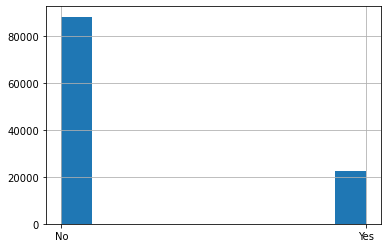

In [191]:
patients_df['No-show'].hist();

In [192]:
patients_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [193]:
patients_df[patients_df.duplicated()==True]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


In [194]:
patients_df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


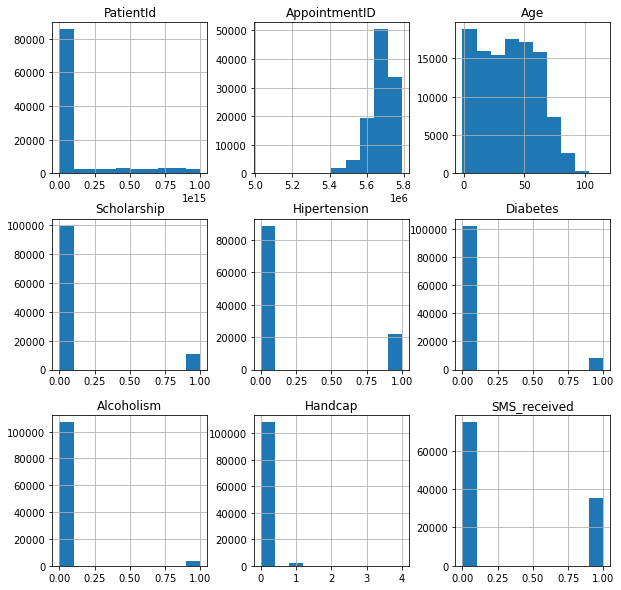

In [195]:
patients_df.hist(figsize=(10,10));

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)

In [196]:
patients_df['ScheduledDay']=pd.to_datetime(patients_df['ScheduledDay'])

In [197]:
patients_df['AppointmentDay']=pd.to_datetime(patients_df['AppointmentDay'])

In [198]:
patient_appointment_count=patients_df.groupby(["PatientId"])["AppointmentID"].count().reset_index(name="count")

In [199]:
patient_appointment_count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62299 entries, 0 to 62298
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   PatientId  62299 non-null  float64
 1   count      62299 non-null  int64  
dtypes: float64(1), int64(1)
memory usage: 973.5 KB


In [200]:
patient_appointment_count.describe()

,PatientId,count
count,6.229900e+04,62299.000000
mean,1.471711e+14,1.774138
std,2.549091e+14,1.770324
min,3.921784e+04,1.000000
25%,4.176937e+12,1.000000
50%,3.198866e+13,1.000000
75%,9.484809e+13,2.000000
max,9.999816e+14,88.000000


In [201]:
patient_appointment_count.rename(columns={'count':'Appointment_count'},inplace=True)

In [202]:
regular_visitor=patient_appointment_count[patient_appointment_count['Appointment_count']>1]

In [203]:
regular_visitor

,PatientId,Appointment_count
7,2.263866e+07,2
8,5.216894e+07,2
12,6.485121e+07,2
14,7.922850e+07,2
16,8.799645e+07,2
...,...,...
62285,9.996275e+14,4
62288,9.997437e+14,2
62291,9.998318e+14,4
62292,9.998774e+14,2


In [ ]:
regular_visitor.plot(kind='bar',figsize=(10,10));

In [ ]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 (Replace this header name!)

In [ ]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
What are the factors that corrolat to patient shoing up less(gender,nighbouhood,medical condition,etc)
''''What factors are
important for us to
know in order to
predict if a patient will
show up for their
scheduled
appointment?'''

# Patients involved in the dataset

# both who shoed up and who didn't show up

In [ ]:
did_not_show_df.describe()

In [ ]:
did_show_df.describe()

In [ ]:
ind_d=did_not_show_df['Hipertension'].value_counts().index

In [ ]:
ind_S=did_show_df['Hipertension'].value_counts().index

In [ ]:
did_not_show_df['Hipertension'].value_counts()[ind_d].plot(kind='bar');

In [ ]:
did_show_df['Hipertension'].value_counts()[ind_S].plot(kind='bar');

In [ ]:
ind_d=did_not_show_df['Diabetes'].value_counts().index

In [ ]:
ind_s=did_show_df['Diabetes'].value_counts().index

In [ ]:
did_not_show_df['Diabetes'].value_counts()[ind_d].plot(kind='bar');

In [ ]:
did_show_df['Diabetes'].value_counts()[ind_S].plot(kind='bar');

In [ ]:
ind_d=did_not_show_df['Alcoholism'].value_counts().index

In [ ]:
ind_s=did_show_df['Alcoholism'].value_counts().index

In [ ]:
did_not_show_df['Alcoholism'].value_counts()[ind_d].plot(kind='bar');

In [ ]:
did_show_df['Alcoholism'].value_counts()[ind_S].plot(kind='bar');

In [ ]:
ind_d=did_not_show_df['SMS_received'].value_counts().index

In [ ]:
ind_s=did_show_df['SMS_received'].value_counts().index

In [ ]:
did_not_show_df['SMS_received'].value_counts()[ind_d].plot(kind='bar');

In [ ]:
did_show_df['SMS_received'].value_counts()[ind_S].plot(kind='bar');

In [ ]:
ind_d=did_not_show_df['Gender'].value_counts().index

In [ ]:
ind_s=did_show_df['Gender'].value_counts().index

In [ ]:
did_not_show_df['Gender'].value_counts()[ind_d].plot(kind='bar');

In [ ]:
did_show_df['Gender'].value_counts()[ind_S].plot(kind='bar');

In [ ]:
ind_d=did_not_show_df['Scholarship'].value_counts().index

In [ ]:
ind_s=did_show_df['Scholarship'].value_counts().index

In [ ]:
did_not_show_df['Scholarship'].value_counts()[ind_d].plot(kind='bar');

In [ ]:
did_show_df['Scholarship'].value_counts()[ind_S].plot(kind='bar');

### Research Question 2  Is there patients with several appointments?


In [ ]:
patients = set()
for x in patients_df['PatientId']:
    patients.add(x)

In [ ]:
len(patients)

In [ ]:
ind=patients_df['PatientId'].value_counts().index

In [ ]:
ind_a=patients_df['AppointmentID'].value_counts().index

# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
What are the chractristic of patients whom has many appointments? on average how many appointment each patient had?

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!

# Regarding Research question 1:
    The chractristics of both the showing up and bon shoing up group are similar the only factor that may be used
    in the prdiction is whether the patient recieved an SMS or not


# The second research question answer is yes